<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.042500,85.325145,28.032727,-10.126513,152.273858,164.371991,-12.098133
1,0.0,1.0,76.918489,95.591587,98.573457,-39.463957,241.619576,287.922360,-46.302784
2,0.0,2.0,39.675414,70.548068,31.163764,31.096565,182.483811,152.523098,29.960713
3,0.0,3.0,87.795897,51.999547,85.397470,-32.663021,202.529893,237.675298,-35.145405
4,0.0,4.0,58.707751,28.815874,64.585793,2.458836,164.568254,162.216423,2.351831
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.088637,60.100733,92.829694,-32.976916,153.042148,184.913717,-31.871569
119996,999.0,116.0,26.383132,36.520419,94.916562,13.314097,181.134210,171.592649,9.541561
119997,999.0,117.0,25.741846,61.162248,66.979299,4.928085,168.811478,161.794601,7.016877
119998,999.0,118.0,97.413372,45.666168,52.523111,5.153879,210.756530,205.589046,5.167484


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    39.042500  85.325145  28.032727 -10.126513  152.273858   
      1.0    76.918489  95.591587  98.573457 -39.463957  241.619576   
      2.0    39.675414  70.548068  31.163764  31.096565  182.483811   
      3.0    87.795897  51.999547  85.397470 -32.663021  202.529893   
      4.0    58.707751  28.815874  64.585793   2.458836  164.568254   
...                ...        ...        ...        ...         ...   
999.0 115.0  23.088637  60.100733  92.829694 -32.976916  153.042148   
      116.0  26.383132  36.520419  94.916562  13.314097  181.134210   
      117.0  25.741846  61.162248  66.979299   4.928085  168.811478   
      118.0  97.413372  45.666168  52.523111   5.153879  210.756530   
      119.0  84.227449  48.490142  52.190647  -4.976044  189.932194   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    164.371991 -12.098133  
      1.0    287.922360 -46.302784  
      2.0    152.523098  29.960713  
      3.0    237.675298 -35.145405  
      4.0    162.216423   2.351831  
...                 ...        ...  
999.0 115.0  184.913717 -31.871569  
      116.0  171.592649   9.541561  
      117.0  161.794601   7.016877  
      118.0  205.589046   5.167484  
      119.0  194.432827  -4.500633  

[120000 rows x 7 columns]

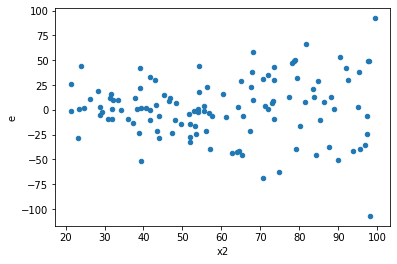

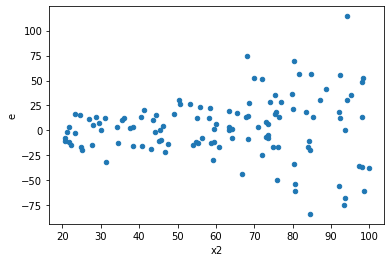

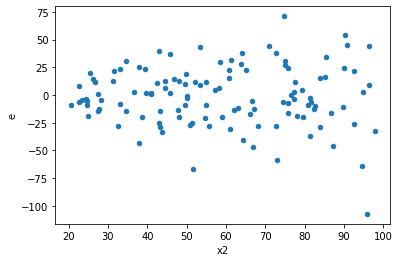

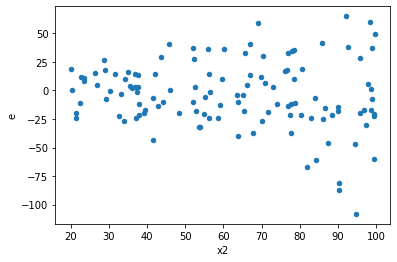

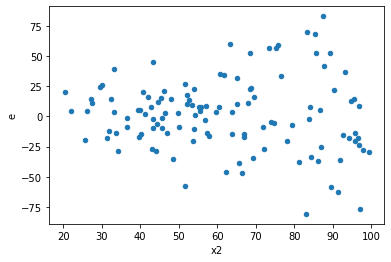

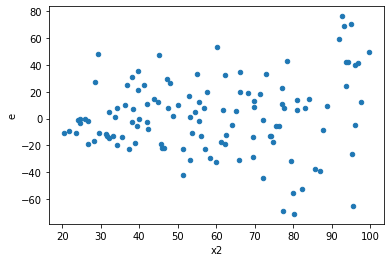

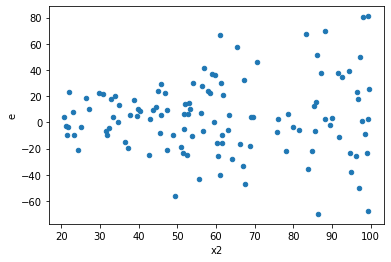

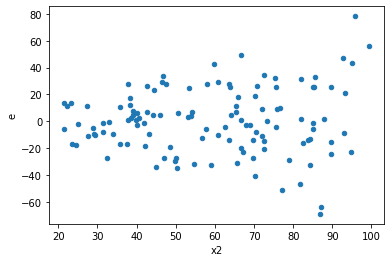

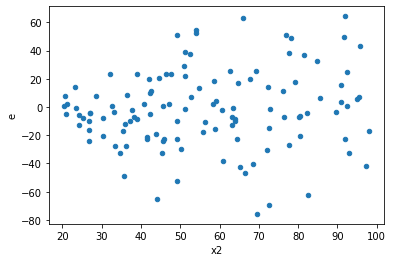

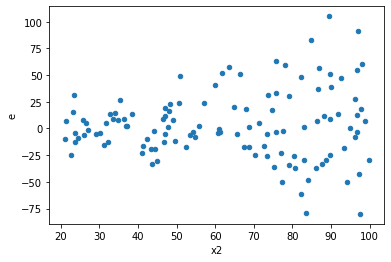

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,73.0,41.0,39717.27615504809,36009.80919458511,544.0722760965491,878.2880291362222,1.6142855788159374,0.09758506129876299,0.9512074693506185,0.048792530649381494,Reject001=1 : Homoscedasticity
3.0,58.0,56.0,31086.75481916929,61815.183448997304,535.9785313649878,1103.8425615892377,2.059490253794417,0.007378159607033696,0.9963109201964832,0.003689079803516848,Reject001=0 : Heteroscedasticity
6.0,53.0,61.0,29415.889318547186,58989.74674108111,555.0167795952299,967.0450285423133,1.7423707968749573,0.036785297177936105,0.981607351411032,0.018392648588968052,Reject001=1 : Homoscedasticity
11.0,52.0,62.0,22800.1972321872,60785.34433516803,438.4653313882154,980.4087795994844,2.2360006810468547,0.0025636020709323137,0.9987181989645338,0.0012818010354661569,Reject001=0 : Heteroscedasticity
12.0,57.0,57.0,30673.92744028037,53784.82837739566,538.1390778996556,943.593480305187,1.753437947654741,0.03598750715322696,0.9820062464233865,0.01799375357661348,Reject001=1 : Homoscedasticity
14.0,57.0,57.0,32683.043848515936,51446.41517899612,573.3867341844901,902.5686873508091,1.5741010971146796,0.08952098734721425,0.9552395063263929,0.04476049367360713,Reject001=1 : Homoscedasticity
17.0,53.0,61.0,23510.419105135843,54966.92528145832,443.59281330444986,901.0971357616119,2.03136098858113,0.00786613487365706,0.9960669325631715,0.00393306743682853,Reject001=0 : Heteroscedasticity
18.0,61.0,53.0,40659.50115688633,59388.738318142154,666.5491992932185,1120.5422324177764,1.6811095619137395,0.05497511323284976,0.9725124433835751,0.02748755661642488,Reject001=1 : Homoscedasticity
20.0,56.0,58.0,32730.29605358273,45036.01434362404,584.4695723854059,776.4830059245525,1.3285259705744454,0.28545794666726043,0.8572710266663698,0.14272897333363022,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,64.0,50.0,72737.43639330848,33094.89222565789,1136.522443645445,661.8978445131578,0.5823887141111721,0.041596243188795394,Reject001=1 : Homoscedasticity
1.0,67.0,47.0,81998.95317828032,20331.812095043282,1223.864972810154,432.59174670304856,0.3534636224695289,9.798812219919049e-05,Reject001=0 : Heteroscedasticity
2.0,73.0,41.0,39717.27615504809,36009.80919458511,544.0722760965491,878.2880291362222,1.6142855788159374,0.09758506129876299,Reject001=1 : Homoscedasticity
3.0,58.0,56.0,31086.75481916929,61815.183448997304,535.9785313649878,1103.8425615892377,2.059490253794417,0.007378159607033696,Reject001=0 : Heteroscedasticity
4.0,67.0,47.0,67777.07289400714,33213.216764068784,1011.598102895629,706.6641864695486,0.6985621903073677,0.17588494049700293,Reject001=1 : Homoscedasticity
5.0,56.0,58.0,57386.24749139931,29263.676161959906,1024.7544194892732,504.5461407234466,0.49235810173417655,0.008568772648657503,Reject001=0 : Heteroscedasticity
6.0,53.0,61.0,29415.889318547186,58989.74674108111,555.0167795952299,967.0450285423133,1.7423707968749573,0.036785297177936105,Reject001=1 : Homoscedasticity
7.0,68.0,46.0,46338.37934489341,21841.724759911962,681.4467550719619,474.820103476347,0.696782397072542,0.1733046919812584,Reject001=1 : Homoscedasticity
8.0,64.0,50.0,57188.19800716788,28561.67082762246,893.5655938619981,571.2334165524492,0.6392741847675373,0.09137778941758128,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      673
Reject001=0 : Heteroscedasticity    327
Name: Result_test, dtype: int64